<a href="https://colab.research.google.com/github/Xarisviero/datastories_for_emme/blob/main/Copy_of_Intro_to_Pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework on Lesson 3 - Intro to Pandas

Αυτή η εργασία περιγράφει μια ενδεικτική ροή εργασιών (workflow) που ακολουθούμε για την ανάλυση δεδομένων.

Ακολουθήστε το ροή του notebook, διαβάστε τις πληροφορίες, τις οδηγίες και τις συμβουλές, συμπληρώστε τον κώδικα που λείπει και τέλος κάντε τις δικές σας αναλύσεις.

**Ανάλυση ενός dataset με ταινίες από το IMDB**

Έχουμε ένα αρχείο .csv το οποίο περιέχει τις καλύτερες 1000 ταινίες του IMDB.

Χρησιμοποιώντας την Python και τις βιβλιοθήκες Pandas και Matplotlib:

* εξετάστε τα δεδομένα
* δημιουργήσε οπτικοποιήσεις για να κάνετε καλύτερες παρατηρήσεις
* εντοπίστε θέματα για διερεύνηση
* θέστε ενδιαφέροντα ερωτήματα
* κάνετε περισσότερες αναλύσεις συνδυάζοντας τα δεδομένα, και
* γράψτε μια μικρή παράγραφο με τα σημαντικότερα ευρήματά σας

## **1. Εισαγωγή βιβλιοθηκών**

Εισάγουμε στο notebook τα pandas ως pd και τη matplotlib.pyplot ως plt  

In [2]:
import pandas as pd
import matplotlib as plt

## **2. Εισαγωγή αρχείου δεδομένων**

Διαβάζουμε με τα Pandas το csv από τη διεύθυνση https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv και το αποθηκεύουμε σε ένα dataframe με όνομα movies_df

In [3]:
movies_df = pd.read_csv("https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv")

## **3. Επισκόπηση του dataframe**

Πρώτα - πρώτα θέλουμε να δούμε και να κατανοήσουμε τι περιλαμβάνεται στα δεδομένα μας.

* ποια είναι τα ονόματα των στηλών;
* τι είδους είναι οι μεταβλητές μας; ποιος είναι ο τύπος των δεδομένων κάθε στήλης;
* πόσες εγγραφές έχει συνολικά το δείγμα μας;
* ποια είναι τα βασικά στατιστικά στοιχεία του dataframe;
* ποιες μεταβλητές συσχετίζονται μεταξύ τους και πώς (correlation);

Παίρνουμε απαντήσεις για τα παραπάνω ερωτήματα με τη βοήθεια των εργαλείων που μας παρέχουν τα Pandas.


In [4]:
movies_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [5]:
movies_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
movies_df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


###**3.1 Πρώτα ερωτήματα**

Ποιες είναι οι μοναδικές τιμές (unique) που παίρνουν οι ονομαστικές μεταβλητές content_rating και genre;

In [7]:
movies_df['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [8]:
movies_df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

Ποιες είναι η πιο μικρή και η πιο μεγάλη σε διάρκεια ταινία;

Tip: εδώ μπορούν να μας βοηθήσουν το sort_values σε συνδυασμό με τα head και tail

In [9]:
movies_df.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [10]:
movies_df.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


Ποια είναι η μέση διάρκεια όλων των ταινιών με ακρίβεια λεπτού;

In [11]:
movies_df['duration'].mean().round()

121.0

### **3.2 Οπτικοποίηση των δεδομένων για καλύτερες παρατηρήσεις**

Όπως έχουμε ήδη δει, διαφορετικά γραφήματα μας δίνουν διαφορετικές πληροφορίες και το είδος του γραφήματος εξαρτάται και από το είδος της μεταβλητής (nominal, interval, scale)

#### **3.2.1 Ιστόγραμμα κατανομής συχνοτήτων (histogram) του duration**

A histogram is an approximate representation of the distribution of numerical data. The term was first introduced by Karl Pearson. To construct a histogram, the first step is to "**bin**" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size. [wikipedia](https://en.wikipedia.org/wiki/Histogram)

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi0.wp.com%2Finsightextractor.com%2Fwp-content%2Fuploads%2F2016%2F06%2FHistogram.jpg%3Fresize%3D183%252C185%26ssl%3D1&f=1&nofb=1&ipt=8c50694cd4292dbb7f5c1aa9e7d355e7587071bc2d7fe56ef71a1449f4f2df4f&ipo=images)

**More sources**:

* Περισσότερες **πληροφορίες για τα ιστογράμματα** μπορείτε να βρείτε εδώ: https://chartio.com/learn/charts/histogram-complete-guide/
* Περισσότερα για το **πώς να επιλέγετε τα σωστά γραφήματα** μπορείτε να δείτε εδώ: https://chartio.com/learn/charts/how-to-choose-data-visualization/

Για να σχεδιάσουμε με την plot() ένα ιστόγραμμα, πρέπει να ορίσουμε στις παραμέτρους της το kind='hist' και να ορίσουμε και αριθμό bins.

π.χ.
```
df['col_name'].plot(kind='hist', bins=20)
```
Η μέγιστη διάρκεια των ταινιών είναι 242 λεπτά, επομένως αν ορίσουμε bins=10 θα έχουμε τη διάρκεια χωρισμένη σε 25λεπτα. Το ιστόγραμμα θα μας δείξει πόσες ταινίες εμπίπτουν σε κάθε bin.

<Axes: ylabel='Frequency'>

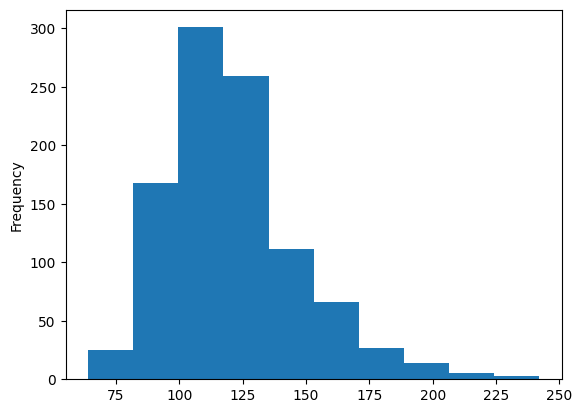

In [12]:
# δημιουργούμε ένα ιστόγραμμα με τις συχνότητες της διάρκειας των ταινιών, επιλέγοντας έναν αριθμό bins=10
movies_df['duration'].plot(kind='hist', bins=10)

#### **3.2.2 Γράφημα πλαισίου (box plot) για τo duration**

Ένα άλλο είδος γραφήματος για συνεχείς μεταβλητές είναι το boxplot.


Το boxplot βασίζεται στα τεταρτημόρια (quartiles). Στο describe() τα βλέπουμε με τα 25%, 50% και 75%.

In [13]:
#describe τη στήλη 'duration'
movies_df.describe()['duration']

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

Στο παραπάνω output του describe() για το duration, βλέπουμε ότι το 25% των ταινιών έχει διάρκεια έως 102 λεπτά, το 50% των ταινιών έχει διάρκεια έως 117 λεπτά και το 75% των ταινιών έχει διάρκεια έως 134 λεπτά. Απ' αυτό προκύπτει ότι η διάμεσος (median), είναι στο 50%, δηλαδή αν κατατάξουμε όλες τις διάρκειες σε αύξουσα σειρά, η μεσαία τιμή είναι τα 117 λεπτά.

Το boxplot μας δείχνει με ένα κουτί τα δύο μεσαία τεταρτημόρια (δηλαδή μέσα σε ποια όρια βρίσκεται το 50% των τιμών του δείγματος), το ανώτατο και το κατώτατο όριο, καθώς και τις ακραίες τιμές (outliers). Το ανώτατο όριο τίθεται μετά το τρίτο τεταρτημόριο (Q3) και σε απόσταση μιάμιση φορά τη διαφορά του Q3-Q1.

![](https://chartio.com/assets/26dba4/tutorials/charts/box-plots/046df50d3e23296f1dda99a385bd54925317c413ffff2a63779ffef0a42b9434/box-plot-construction.png)

**Read more**:
* Περισσότερα για το boxplot μπορείτε να δείτε εδώ: https://chartio.com/learn/charts/box-plot-complete-guide/

Για να σχεδιάσουμε ένα boxplot με την plot() αρκεί να ορίσουμε kind=box.

<Axes: >

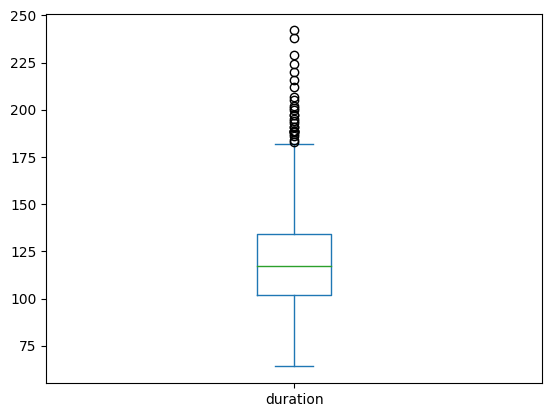

In [14]:
# boxplot γράφημα για το duration
movies_df['duration'].plot(kind='box')

Με το boxplot βλέπουμε ότι:

* το 50% των ταινιών του δείγματος έχει διάρκεια από 102 έως 134 λεπτά,
* το κάτω άκρο είναι στο min, δηλαδή στα 64 λεπτά,
* το άνω άκρο είναι στα 182 λεπτά (Q3 + 1.5\*(Q3-Q1) = Q3 + 1.5\*(134-102) = 134 + 1.5\*32 = 182) και
* η διάμεσος είναι στα 117 λεπτά.
* Όλες οι ταινίες με διάρκεια μεγαλύτερη από 182 λεπτά (3 ώρες) είναι outliers.

Τα **outliers** είναι συχνά ένα ωραίο θέμα έρευνας. Έτσι, από την εξέταση των δεδομένων μας προκύπτουν μερικά ενδιαφέροντα ερωτήματα που θα μπορούσαμε να θέσουμε αργότερα:
* Ποιές είναι οι ασυνήθιστα μεγάλης διάρκειας ταινίας μέσα στις 1000 πρώτες του IMDB;
* Ποια είναι τα χαρακτηριστικά τους (content_rating, genre, star_rating);

## **4. Συνέχιση της επισκόπησης, ανάλυσης και οπτικοποίησης των δεδομένων**

### **4.1 Εξέταση του content rating** (ονομαστική μεταβλητή / nominal)

Ξαναβλέπουμε τις μοναδικές τιμές (unique) που παίρνει η μεταβλητή content_rating

In [15]:
# unique τιμές της στήλης content_rating
movies_df['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

#### **nan (κενές τιμές)**

Παρατηρούμε ότι στις τιμές υπάρχει και το nan. Το nan σημαίνει ότι η τιμή είναι κενή.

Με τη συνάρτηση isnull(), κοιτάμε να δούμε αν υπάρχουν κενές τιμές και σε άλλες στήλες και πόσες είναι σε κάθε στήλη.

π.χ.
```
df.isnull().sum(axis=0)
```
**εξήγηση του παραπάνω κώδικα**:
* η συνάρτηση isnull() ελέγχει αν υπάρχει nan. Επομένως επιστρέφει τιμές True/False για κάθε κελί
* με το sum() μετά το isnull() ζητάμε το άθροισμα των τιμών True
* με το axis=0 στις παραμέτρους του sum() ορίζουμε ότι η πρόσθεση θα γίνει κατά στήλη (το axis=0 αναφέρεται στις στήλες και το axis=1 στις γραμμές)

In [16]:
# sum των nan τιμών σε κάθε στήλη
movies_df.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

**Εντοπισμός των nan**

Ψάχνουμε με firtering να δούμε πού βρίσκονται οι κενές τιμές.

π.χ.
```
df[df['col_name'].isnull()]
```

In [17]:
# filter dataframe to find rows with nan value in 'content_rating' column
movies_df[movies_df['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Αν έχουμε τη δυνατότητα να βρούμε τις τιμές που λείπουν, πηγαίνουμε στις πηγές. Στη συγκεκριμένη περίπτωση, πάμε στο IMDB και βρίσκουμε το content_rating για τις συγκεκριμένες ταινίες.

Στη συνέχεια, εισάγουμε τις τιμές που βρήκαμε στο dataframe στα αντίστοιχα κελιά. Η επιλογή (selection) των κελιών γίνεται με τo loc.

π.χ.

```
df.loc[[index_num1, index_num2],'col_name'] = 'value'
df.loc[one_index_number,'col_name'] = 'value'
```


In [32]:
# assign content_rating values to cells with nan
movies_df.loc[[187, 649,936],'content_rating']= 'value'
movies_df.loc[187,'content_rating	']= 'value'

In [33]:
# ελέγχουμε την υλοποίηση των αλλαγών
# e.g. df.loc[[index_num1, index_num2, ...], 'col_name']
movies_df.loc[187,'content_rating	']= 'value'

**Μείωση των κατηγοριών για ακατάλληλο περιεχόμενο (adult content)**

Από τις μοναδικές τιμές της στήλης content_rating, παρατηρούμε ότι στις τιμές υπάρχουν τα NC-17, X και TV-MA. Και οι 3 αυτοί χαρακτηρισμοί αφορούν περιεχόμενο κατάλληλο μόνο για ενήλικες άνω των 17.

Επομένως, μπορούμε με replace να αντικαταστήσουμε τα Χ και TV-MA με το ΝC-17, και να έχουμε για όλες τις ταινίες ενηλίκων τη σήμανση NC-17.

**Note**: για να εγγραφεί η αλλαγή στο dataframe πρέπει να την αποθηκεύσουμε, δηλαδή να ορίσουμε ότι η στήλη content_rating θα είναι η στήλη content_rating **με** την αλλαγή.

π.χ.
```
df['col_name'] = df['col_name'].replace(['old_val1','old_val2'], 'new_value')
```


In [20]:
# replace 'X' and 'TV-MA' with 'NC-17'


In [21]:
# ελέγχουμε την υλοποίηση των αλλαγών


#### **Καταμέτρηση του πλήθους των ταινιών σε κάθε κατηγορία περιεχομένου**

Όπως έχουμε δει στην Άσκηση 11 στο "Intro to Pandas.ipynb", μπορούμε να κάνουμε ομαδοποίηση των τιμών και να βρούμε τις συχνότητές τους (count).

Αυτό θα κάνουμε κι εδώ για το content rating: ομαδοποίηση (groupby) ως προς το content_rating, καταμέτρηση (count) των τίτλων των ταινιών σε κάθε ομάδα και ταξινόμηση του αποτελέσματος σε φθίνουσα σειρά.

**Γραφήματα**

Οπτικοποιούμε την ομαδοποίηση με ένα bar chart.

Για να ομορφύνει το γράφημα μπορούμε να προσθέσουμε έναν τίτλο καθώς και τίτλους στους άξονες x και y:
* Για τον τίτλο του γραφήματος προσθέτουμε μέσα στην παρένθεση του plot: title='Content Rating Visualization'
* Για τα labels στους άξονες x και y προσθέτουμε κάτω από την εντολή του plot στο ίδιο code cell:
```
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
```

In [22]:
# create bar chart




Βλέπουμε το γράφημα και εξετάζουμε αν είναι ακόμα καλύτερο με οριζόντιο barchart. Το ξαναφτιάχνουμε από κάτω για να τα συγκρίνουμε.

**Note**: Προσέχουμε αν είναι σωστή η ταξινόμηση (τα περισσότερα counts να είναι στην κορυφή) και τα labels των αξόνων x και y

In [23]:
# create horizontal bar chart




### **4.2 Εξέταση με συγκρίσεις**

#### **Υπάρχει συσχέτιση της βαθμολογίας των ταινιών (star_rating) με τη διάρκεια των ταινιών (duration);**

Βλέπουμε τα στατιστικά στοιχεία για τη διάρκεια των ταινιών (duration) ανά βαθμολογία (star_rating) με ένα boxplot.

π.χ.
```
df.plot[kind='', column='', by='')
```

Παρατηρώντας το γράφημα βλέπουμε ότι:
* ταινίες με βαθμολογία 8.9 έχουν μεγαλύτερη διάρκεια
* καμία ταινία με διάρκεια μεγαλύτερη από 215 λεπτά δεν έχει βαθμολογία πάνω από 8.4
* υπάρχει μόνο μία ταινία για κάθε βαθμολογία από 9 και πάνω (συνολικά 4 ταινίες)

Βρίσκουμε τα ακριβή στατιστικά στοιχεία για τις ταινίες με βαθμολογία 8.9, με conditional filtering (η τιμή της στήλης star_rating να είναι ίση με 8.9) και describe().

π.χ.
```
df[df['col_name'] == value].describe()
```


In [24]:
# stats for star_rating


Επίσης με filtering, βρίσκουμε και ποιες είναι αυτές οι ταινίες (με star_rating ίσο με 8.9).

In [25]:
# rows with star_rating = 8.9


### **4.3 Καλύτερη ταινία ανά είδος**

Μπορούμε να βρούμε την ταινία με την ψηλότερη βαθμολογία (star_rating) σε κάθε είδος (genre) με τη χρήση των sort_values, groupby και το keyword first():

π.χ.

```
df.sort_values('col_name_for_sorting', ascending=False).groupby('col_name_for_grouping', as_index=False)[['title','star_rating']].first()
```

**Εξήγηση του παραπάνω κώδικα**:

* df.sort_values('col_name_for_sorting', ascending=False): ταξινομούμε το dataframe σε φθίνουσα σειρά ως προς την επιθυμητή στήλη
* groupby('col_name_for_grouping', as_index=False): ομαδοποιούμε τα δεδομένα στη βάση των τιμών της επιθυμητής στήλης - με το index=False ζητάμε να μη γίνουν index του dataframe που θα προκύψει τα ονόματα των ομάδων που θα φτιάξει το groupby
* [['title','star_rating']]: oρίζουμε τις στήλες που θα έχει το dataframe που θα προκύψει
* first(): ζητάμε την πρώτη εγγραφή σε κάθε ομάδα (στη βάση της φθίνουσας σειράς που έφτιαξε το sort_values) [*με το last() θα παίρναμε την τελευταία εγγραφή*]

In [26]:
# top star rated movie in every genre


## **5. Περαιτέρω αναζητήσεις, αναλύσεις και οπτικοποιήσεις των δεδομένων**

Συνεχίστε τη ίδια διαδικασία για να θέσετε περαιτέρω ερωτήματα στα δεδομένα και να πάρετε περισσότερες απαντήσεις.

Μερικά ενδεικτικά ερωτήματα:
* υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του είδους των ταινιών (genre);
* σχετίζεται η βαθμολογία (star_rating) με τον χαρακτηρισμό περιεχομένου (content_rating);
* ποιος είναι ο μ.o. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre);
* σχετίζεται η διάρκεια (duration) με το είδος (genre);